In [268]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from io import StringIO

In [269]:
Data = pd.read_csv('r4.csv')

In [270]:
Data.head()

,id,Date,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,...,Hour,Humidity,Rainfall,Rented Bike Count,Seasons,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed
0,1,08/11/2018,8.8,0.585382,0.026140,0.920350,0.315114,0.977342,0.169791,0.656922,...,8,89,0.0,148,Autumn,0.0,0.02,10.6,689,1.5
1,2,26/09/2018,8.9,0.730931,0.066437,0.349515,0.456733,0.822811,0.471541,0.424646,...,7,62,0.0,335,Autumn,0.0,0.01,16.3,2000,2.0
2,3,12/01/2018,-18.5,0.826907,0.325077,0.772166,0.918194,0.994359,0.239573,0.535647,...,22,39,0.0,186,Winter,0.0,0.00,-6.9,2000,1.6
3,4,26/07/2018,24.8,0.115778,0.793062,0.259372,0.797660,0.109027,0.657459,0.522908,...,21,74,0.0,1868,Summer,0.0,0.00,30.0,1056,2.7
4,5,26/05/2018,9.1,0.319288,0.842444,0.001954,0.976224,0.898576,0.036342,0.525282,...,13,31,0.0,1441,Spring,0.0,3.29,27.8,1326,2.0


In [271]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11680 entries, 0 to 11679
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     11680 non-null  int64  
 1   Date                   11680 non-null  object 
 2   Dew point temperature  11680 non-null  float64
 3   feat01                 11680 non-null  float64
 4   feat02                 11680 non-null  float64
 5   feat03                 11680 non-null  float64
 6   feat04                 11680 non-null  float64
 7   feat05                 11680 non-null  float64
 8   feat06                 11680 non-null  float64
 9   feat07                 11680 non-null  float64
 10  feat08                 11680 non-null  float64
 11  feat10                 11680 non-null  float64
 12  Functioning Day        11680 non-null  object 
 13  Holiday                11680 non-null  object 
 14  Hour                   11680 non-null  int64  
 15  Hu

In [272]:

# Define the data
data = {
    "Parameters/Features": [
        "Date", "Dew point temperature", "feature 01-10",  "Functioning Day",
        "Holiday", "Hour", "Humidity",  "Rented Bike count", "Seasons", 
        "Solar Radiation", "Temperature", "Visibility", "Wind speed","Rainfall", "Snowfall"
    ],
    "Abbreviation": [
        "Date", "Dew point temperature", "feat01-10", "Functioning Day", "Holiday", "Hour", "Humidity",
         "Rented Bike Count", "Seasons",  "Solar radiation", "Temperature",
        "Visibility", "Wind speed","Rainfall", "Snowfall"
    ],
    "Type": [
        "datetime64[ns]", "Continuous", "Continuous",  "Categorical", "Categorical",
        "Continuous", "Continuous",  "Continuous", "Categorical", 
        "Continuous", "Continuous", "Continuous", "Continuous", "Continuous", "Continuous"
    ],
    "Measurement": [
        "1=2018, 0=2017", "°C", "", "0=NoFunc, 1=Func", "1=Holiday, 0=No holiday",
        "0, 1, 2, ..., 23", "%",  "0, 1, 2, ..., 3556", "3=Autumn, 1=Spring, 2=Summer, 4=Winter",
         "MJ/m²", "°C", "10 m", "m/s", "Mm", "cm"
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Style the table
styled_df = df.style.set_table_styles(
    [
        {"selector": "thead th", "props": [("background-color", "#48AAAD"), ("color", "white"), ("font-weight", "bold")]},
        {"selector": "tbody td", "props": [("text-align", "center")]},
        {"selector": "table", "props": [("border", "1px solid black"), ("border-collapse", "collapse"), ("width", "100%")]}
    ]
).set_properties(**{"border": "1px solid black", "padding": "5px"})

styled_df


,Parameters/Features,Abbreviation,Type,Measurement
0,Date,Date,datetime64[ns],"1=2018, 0=2017"
1,Dew point temperature,Dew point temperature,Continuous,°C
2,feature 01-10,feat01-10,Continuous,
3,Functioning Day,Functioning Day,Categorical,"0=NoFunc, 1=Func"
4,Holiday,Holiday,Categorical,"1=Holiday, 0=No holiday"
5,Hour,Hour,Continuous,"0, 1, 2, ..., 23"
6,Humidity,Humidity,Continuous,%
7,Rented Bike count,Rented Bike Count,Continuous,"0, 1, 2, ..., 3556"
8,Seasons,Seasons,Categorical,"3=Autumn, 1=Spring, 2=Summer, 4=Winter"
9,Solar Radiation,Solar radiation,Continuous,MJ/m²


In [273]:
Data.describe()

,id,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat10,Hour,Humidity,Rainfall,Rented Bike Count,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed
count,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000
mean,5840.500000,0.752046,0.501512,0.491890,0.495178,0.503874,0.501122,0.504344,0.506352,0.477377,0.497148,11.494521,56.734589,0.121995,603.504795,0.102072,0.520689,9.724161,1419.188356,1.773476
std,3371.869907,13.496679,0.289155,0.289140,0.288472,0.289598,0.289319,0.289384,0.124456,0.128627,0.287505,6.921425,20.432232,1.014351,600.096799,0.488215,0.823745,12.246182,619.962048,1.061456
min,1.000000,-30.600000,0.000060,0.000053,0.000041,0.000038,0.000313,0.000463,0.000000,0.000000,0.000126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.800000,27.000000,0.000000
25%,2920.750000,-10.025000,0.247687,0.242200,0.245594,0.251301,0.253241,0.252874,0.424095,0.391367,0.250207,5.000000,40.000000,0.000000,168.000000,0.000000,0.000000,0.100000,896.000000,1.000000
50%,5840.500000,0.700000,0.500108,0.484624,0.489729,0.503993,0.502959,0.512171,0.507535,0.475609,0.498043,11.000000,55.000000,0.000000,365.000000,0.000000,0.000000,8.500000,1678.000000,1.600000
75%,8760.250000,11.525000,0.753892,0.740760,0.744242,0.756368,0.751092,0.752649,0.588661,0.563748,0.744266,17.000000,73.000000,0.000000,904.250000,0.000000,0.820000,20.000000,1998.000000,2.400000
max,11680.000000,27.200000,0.999985,0.999982,0.999993,0.999998,0.999842,0.999929,1.000000,1.000000,0.999875,23.000000,98.000000,35.000000,3556.000000,8.800000,3.520000,39.400000,2000.000000,7.400000


In [274]:
Data = Data.drop(columns=['id'])

In [275]:
Data.value_counts('Rainfall')

Rainfall
0.0     11088
0.5       125
1.0        68
1.5        59
0.1        54
        ...  
4.9         1
1.2         1
1.3         1
2.4         1
35.0        1
Name: count, Length: 61, dtype: int64

In [276]:
Data.value_counts('Snowfall')

Snowfall
0.0    10845
1.0       78
0.3       75
0.5       68
0.9       68
0.7       62
2.0       44
0.8       43
1.6       38
0.4       35
2.2       35
0.6       30
0.2       29
3.5       26
2.6       23
1.2       16
2.5       15
2.7       12
1.8        9
3.0        8
4.1        7
4.0        7
3.7        6
3.2        6
3.8        6
1.7        6
2.1        6
1.9        6
1.3        6
1.1        5
2.4        5
2.3        5
3.9        4
4.3        4
4.8        4
3.4        4
3.3        4
0.1        4
1.4        4
2.8        3
5.0        3
3.1        2
2.9        2
4.2        2
1.5        2
5.1        2
8.8        2
3.6        1
6.0        1
7.0        1
7.1        1
Name: count, dtype: int64

In [277]:
Data.value_counts('Date')

Date
01/01/2018    48
14/03/2018    48
15/01/2018    48
15/02/2018    48
15/03/2018    48
              ..
05/08/2018    24
17/04/2018    24
17/05/2018    24
17/06/2018    24
04/10/2018    24
Name: count, Length: 365, dtype: int64

In [278]:
#changing the type of Date to the date format datetime64[ns]
Data['Date'] = pd.to_datetime(Data['Date'], format='%d/%m/%Y')
# from when untill when
print('Data collected from :', Data['Date'].min())
print('Data collected untill :', Data['Date'].max())
#extract the year
Data['year'] = Data['Date'].dt.year
Data['month'] = Data['Date'].dt.month

Data collected from : 2017-12-01 00:00:00
Data collected untill : 2018-11-30 00:00:00


In [279]:
Data.value_counts('year')

year
2018    10192
2017     1488
Name: count, dtype: int64

In [280]:
year_mapping={2018 :1, 2017 :0}
Data['year']=Data['year'].map(year_mapping)

In [281]:
Data.value_counts('year')

year
1    10192
0     1488
Name: count, dtype: int64

In [282]:

Data.value_counts('month')

month
1     1488
3     1488
12    1488
2     1344
5      744
7      744
8      744
10     744
4      736
6      720
9      720
11     720
Name: count, dtype: int64

In [283]:
Data = Data.drop(columns=['Date'])

In [284]:
Data.value_counts('Seasons')

Seasons
Winter    4320
Spring    2968
Summer    2208
Autumn    2184
Name: count, dtype: int64

In [285]:
# Define the mapping of numbers to seasons
season_mapping = {'Spring': 1, 'Summer':2,  'Autumn':3,'Winter':4}

# Apply the mapping using map
Data['Seasons'] = Data['Seasons'].map(season_mapping)


In [286]:
Data.value_counts('Seasons')

Seasons
4    4320
1    2968
2    2208
3    2184
Name: count, dtype: int64

In [287]:
Data.value_counts('Holiday')

Holiday
No Holiday    11032
Holiday         648
Name: count, dtype: int64

In [288]:
holiday_mapping={'No Holiday':0, 'Holiday':1}
Data['Holiday'] = Data['Holiday'].map(holiday_mapping)

In [289]:
Data.value_counts('Holiday')

Holiday
0    11032
1      648
Name: count, dtype: int64

In [290]:
Data.value_counts('Functioning Day')

Functioning Day
Yes    11385
No       295
Name: count, dtype: int64

In [291]:
func_mapping={'No':0, 'Yes':1}
Data['Functioning Day'] = Data['Functioning Day'].map(func_mapping)

In [292]:
Data.value_counts('Functioning Day')

Functioning Day
1    11385
0      295
Name: count, dtype: int64

In [293]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select columns to scale (excluding 'Rented Bike Count' and 'Hour')
columns_to_scale = Data.select_dtypes(include=['float64', 'int64']).columns.difference(['Hour', 'Functioning Day', 'year', 'month', 'Holiday', 'Seasons'])

# Apply MinMax scaling to the selected columns
Data[columns_to_scale] = scaler.fit_transform(Data[columns_to_scale])

# Create a new DataFrame with the scaled values
#scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Combine the scaled data with the non-scaled columns
#final_df = pd.concat([Data[['Rented Bike Count', 'Hour']], scaled_df], axis=1)





In [294]:
Data.head()

,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat10,...,Rainfall,Rented Bike Count,Seasons,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed,year,month
0,0.681661,0.585366,0.026089,0.920352,0.315089,0.977490,0.169418,0.656922,0.424366,0.094350,...,0.0,0.041620,3,0.0,0.005682,0.496503,0.335530,0.202703,1,11
1,0.683391,0.730925,0.066389,0.349491,0.456714,0.822886,0.471329,0.424646,0.382840,0.265212,...,0.0,0.094207,3,0.0,0.002841,0.596154,1.000000,0.270270,1,9
2,0.209343,0.826909,0.325048,0.772162,0.918193,0.994515,0.239237,0.535647,0.559941,0.521049,...,0.0,0.052306,4,0.0,0.000000,0.190559,1.000000,0.216216,1,1
3,0.958478,0.115726,0.793066,0.259343,0.797654,0.108765,0.657347,0.522908,0.681320,0.857901,...,0.0,0.525309,2,0.0,0.000000,0.835664,0.521541,0.364865,1,7
4,0.686851,0.319252,0.842451,0.001913,0.976225,0.898687,0.035898,0.525282,0.674364,0.198284,...,0.0,0.405231,1,0.0,0.934659,0.797203,0.658388,0.270270,1,5


In [295]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = Data.drop(columns=['Rented Bike Count'])  # Drop the target column
y = Data['Rented Bike Count']  # Target column

# Split the data: 75% for training, 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display dimensions of the training and testing sets
print(f"Training set dimensions (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Testing set dimensions (X_test, y_test): {X_test.shape}, {y_test.shape}")


Training set dimensions (X_train, y_train): (8760, 23), (8760,)
Testing set dimensions (X_test, y_test): (2920, 23), (2920,)


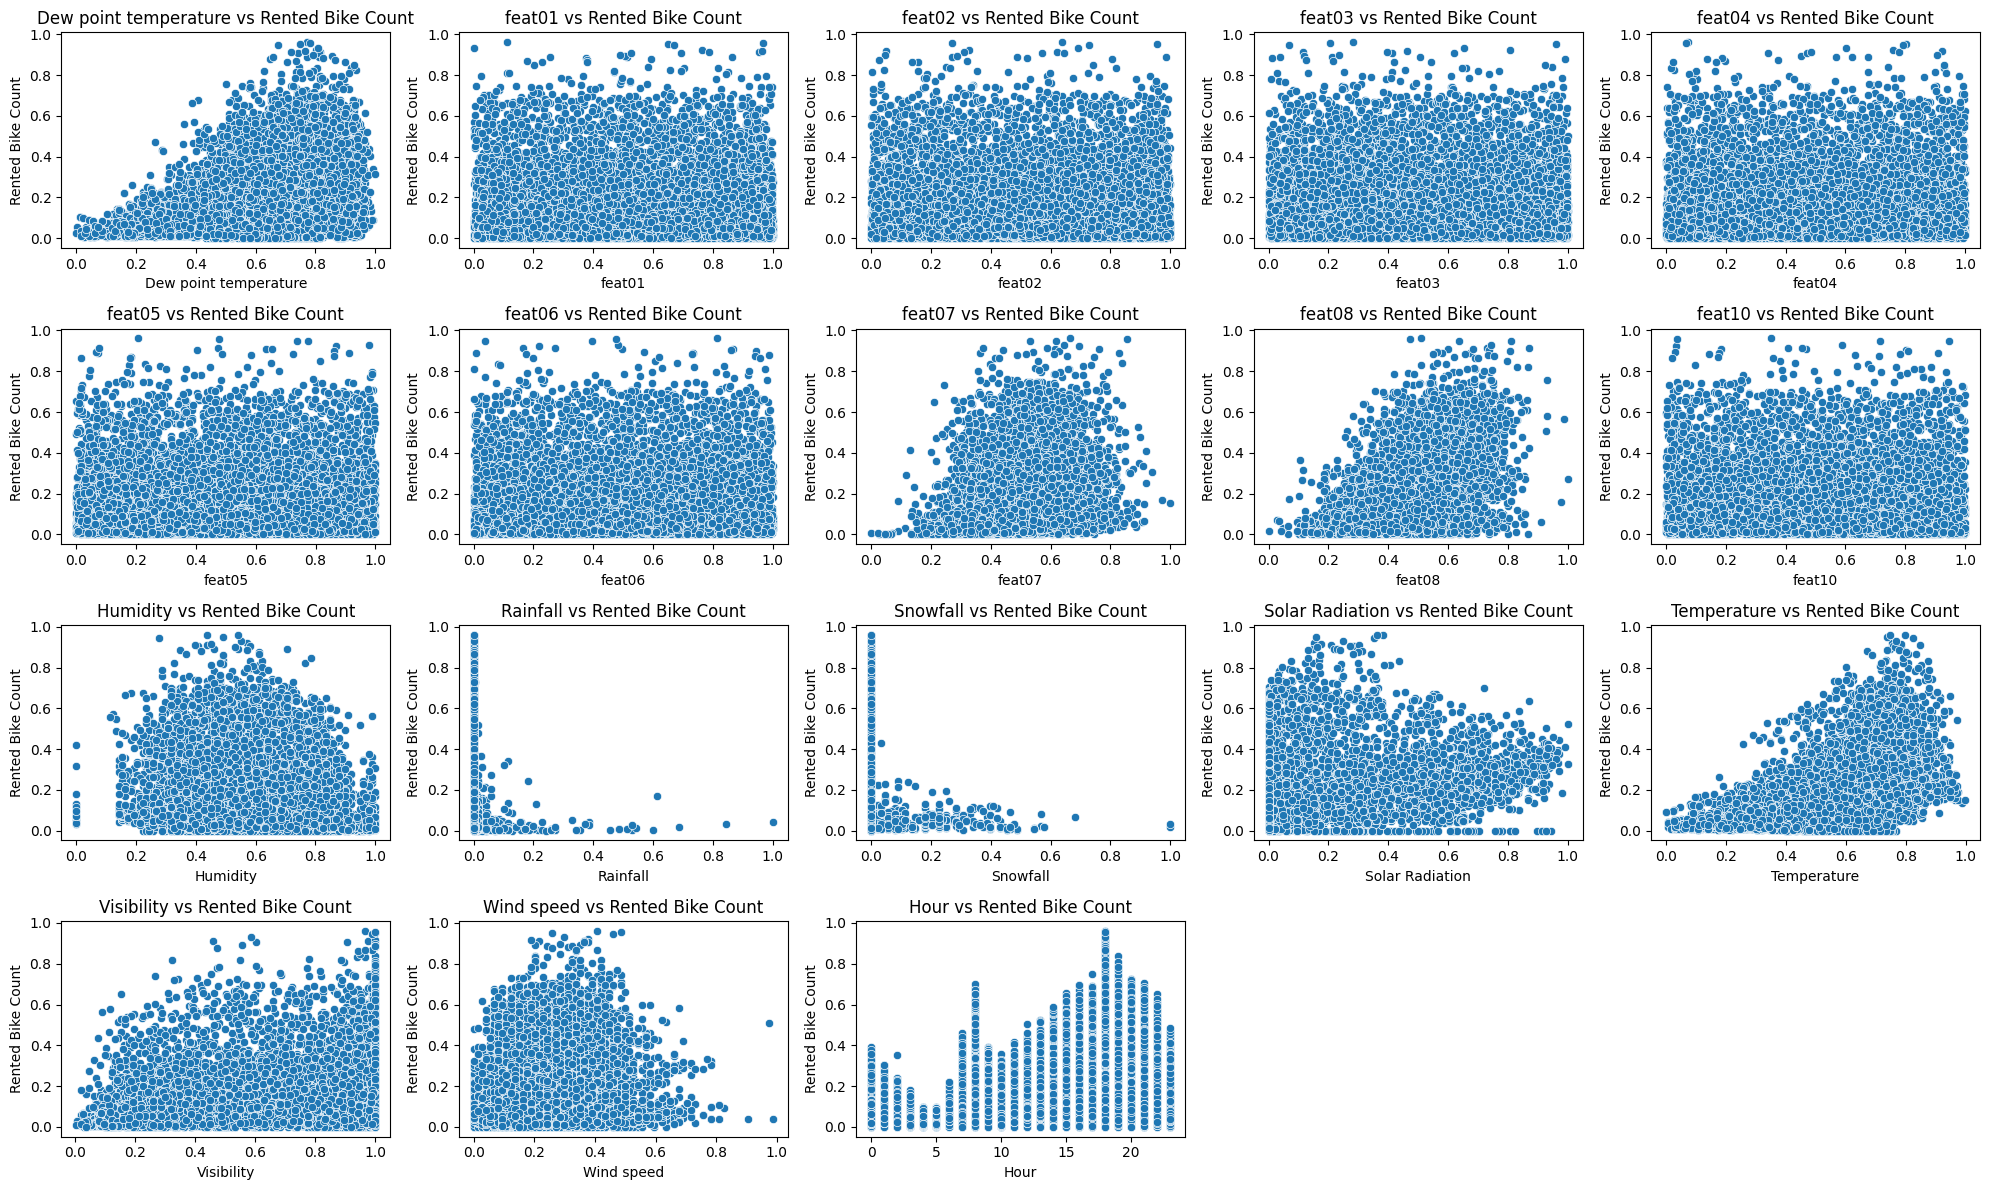

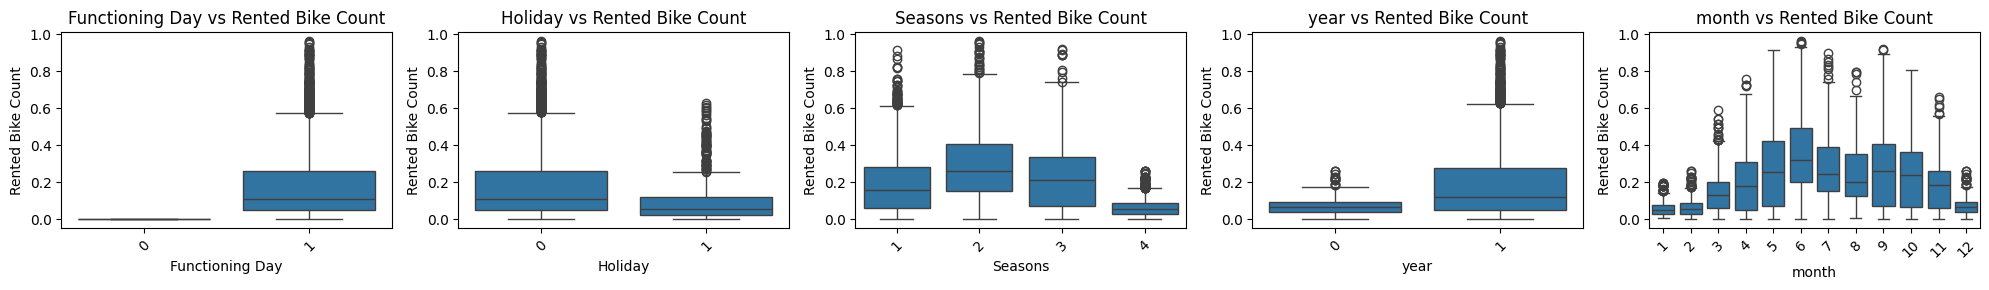

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns
# Combine X_train and y_train into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Function to plot relationships in a grid layout
def plot_relationships_grid(df, target_variable):
    # Define features
    numerical_features = [
        "Dew point temperature", "feat01", "feat02", "feat03", "feat04",
        "feat05", "feat06", "feat07", "feat08", "feat10", "Humidity",
        "Rainfall", "Snowfall", "Solar Radiation", "Temperature",
        "Visibility", "Wind speed", "Hour"
    ]
    categorical_features = ["Functioning Day", "Holiday", "Seasons", 'year', 'month']

    # Set up grid for numerical features
    n_num = len(numerical_features)
    n_rows_num = (n_num + 4) // 5  # 4 rows, 5 columns
    fig_num, axes_num = plt.subplots(n_rows_num, 5, figsize=(20, n_rows_num * 3))
    axes_num = axes_num.flatten()

    for i, feature in enumerate(numerical_features):
        if feature in df.columns:  # Check if feature exists
            sns.scatterplot(x=feature, y=target_variable, data=df, ax=axes_num[i])
            axes_num[i].set_title(f'{feature} vs {target_variable}')
            axes_num[i].set_xlabel(feature)
            axes_num[i].set_ylabel(target_variable)

    # Hide unused axes
    for j in range(i + 1, len(axes_num)):
        fig_num.delaxes(axes_num[j])

    plt.tight_layout()
    plt.show()

    # Set up grid for categorical features
    n_cat = len(categorical_features)
    n_rows_cat = (n_cat + 4) // 5  # Adjust rows for fewer categorical features
    fig_cat, axes_cat = plt.subplots(n_rows_cat, 5, figsize=(20, n_rows_cat * 3))
    axes_cat = axes_cat.flatten()

    for i, feature in enumerate(categorical_features):
        if feature in df.columns:  # Check if feature exists
            sns.boxplot(x=feature, y=target_variable, data=df, ax=axes_cat[i])
            axes_cat[i].set_title(f'{feature} vs {target_variable}')
            axes_cat[i].set_xlabel(feature)
            axes_cat[i].set_ylabel(target_variable)
            axes_cat[i].tick_params(axis='x', rotation=45)

    # Hide unused axes
    for j in range(i + 1, len(axes_cat)):
        fig_cat.delaxes(axes_cat[j])

    plt.tight_layout()
    plt.show()

# Call the function
#plot_relationships_grid(X_train.assign(target=y_train), "target")
plot_relationships_grid(train_data, 'Rented Bike Count')


**Feature Enginure**

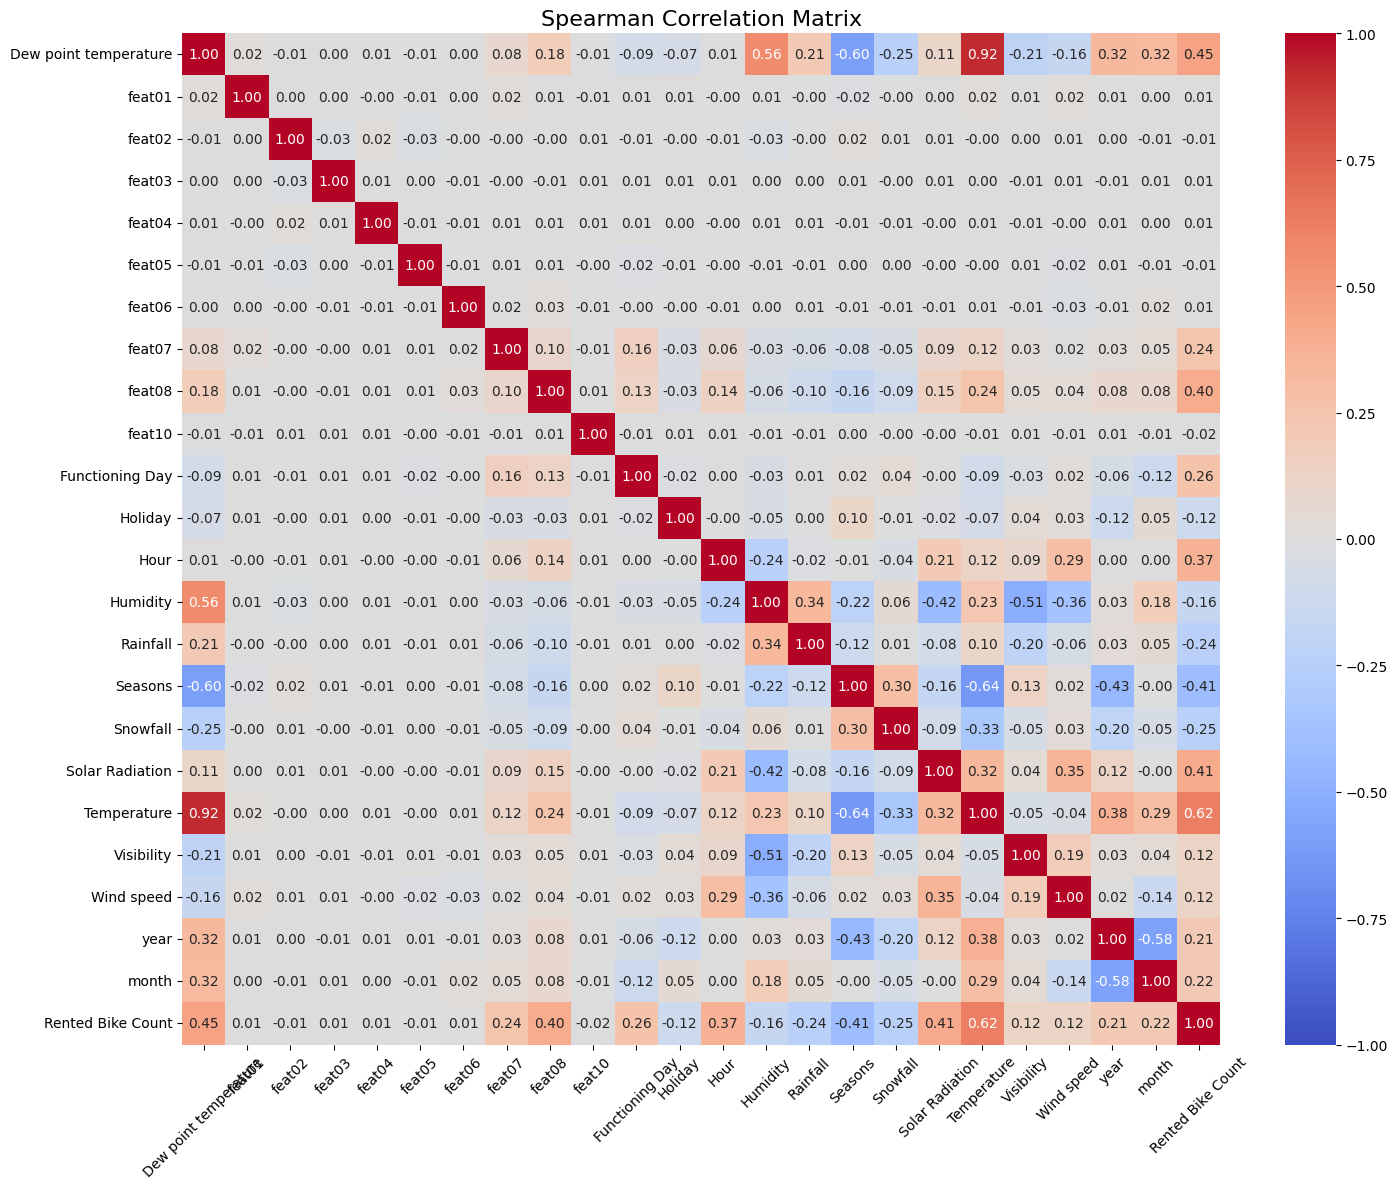

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns
# Combine X_train and y_train into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Function to plot the correlation heatmap
def plot_correlation_matrix(df, method='pearson'):
    """
    Plot a heatmap of the correlation matrix with numbers.
    Parameters:
    - df: DataFrame containing the dataset.
    - method: Correlation method ('pearson', 'spearman', 'kendall').
    """
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])

    # Compute correlation matrix
    corr_matrix = numeric_df.corr(method=method)

    # Create the heatmap
    plt.figure(figsize=(15, 12))  # Adjust figure size for better visualization
    sns.heatmap(
        corr_matrix,
        annot=True,  # Display correlation values
        fmt=".2f",   # Format for the numbers
        cmap="coolwarm",  # Color palette
        cbar=True,    # Show color bar
        vmin=-1, vmax=1  # Range of correlation values
    )
    plt.title(f'{method.capitalize()} Correlation Matrix', fontsize=16)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10, rotation=0)
    plt.tight_layout()
    plt.show()

# Example call with a DataFrame `Data`:
plot_correlation_matrix(train_data, method='spearman')


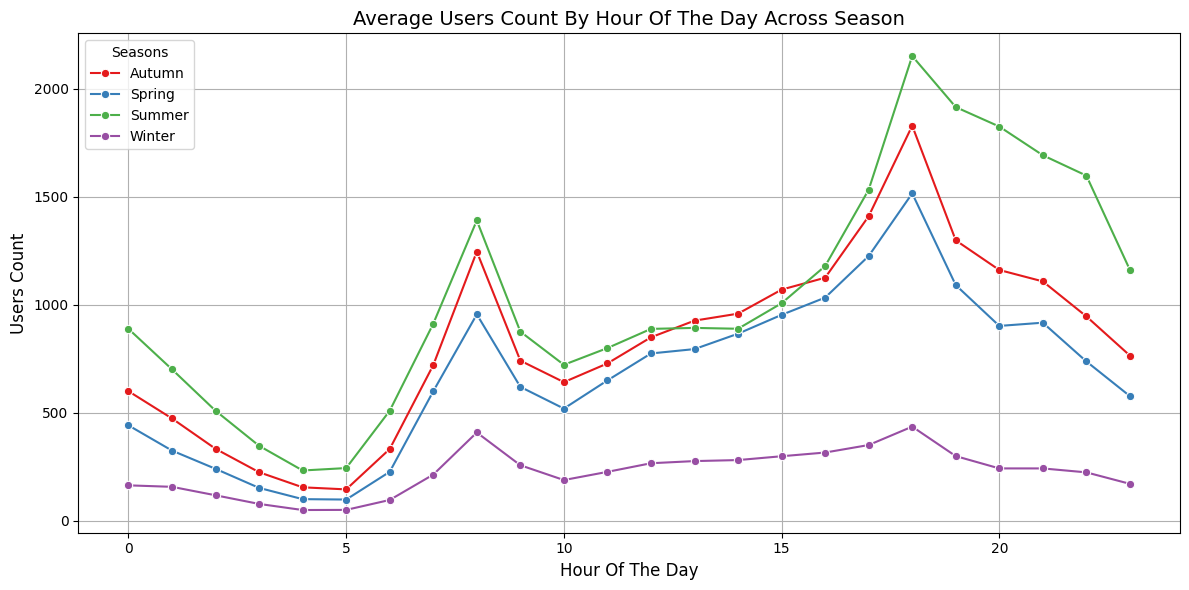

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot average users count by hour across seasons
def plot_average_users_by_hour_season(df, target, hour_col='Hour', season_col='Seasons'):
    """
    Plot average user count by hour of the day across seasons.
    Parameters:
    - df: DataFrame containing the data.
    - target: Name of the target variable column (e.g., Rented Bike Count).
    - hour_col: Name of the hour column.
    - season_col: Name of the season column.
    """
    # Map season codes to names
    season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'}
    df[season_col] = df[season_col].map(season_mapping)
    # Aggregate the data
    aggregated_data = df.groupby([hour_col, season_col])[target].mean().reset_index()

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=aggregated_data,
        x=hour_col,
        y=target,
        hue=season_col,
        marker='o',
        palette='Set1'
    )

    # Customize the plot
    plt.title('Average Users Count By Hour Of The Day Across Season', fontsize=14)
    plt.xlabel('Hour Of The Day', fontsize=12)
    plt.ylabel('Users Count', fontsize=12)
    plt.legend(title='Seasons', fontsize=10, loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example call
plot_average_users_by_hour_season(train_data, target='Rented Bike Count', hour_col='Hour', season_col='Seasons')


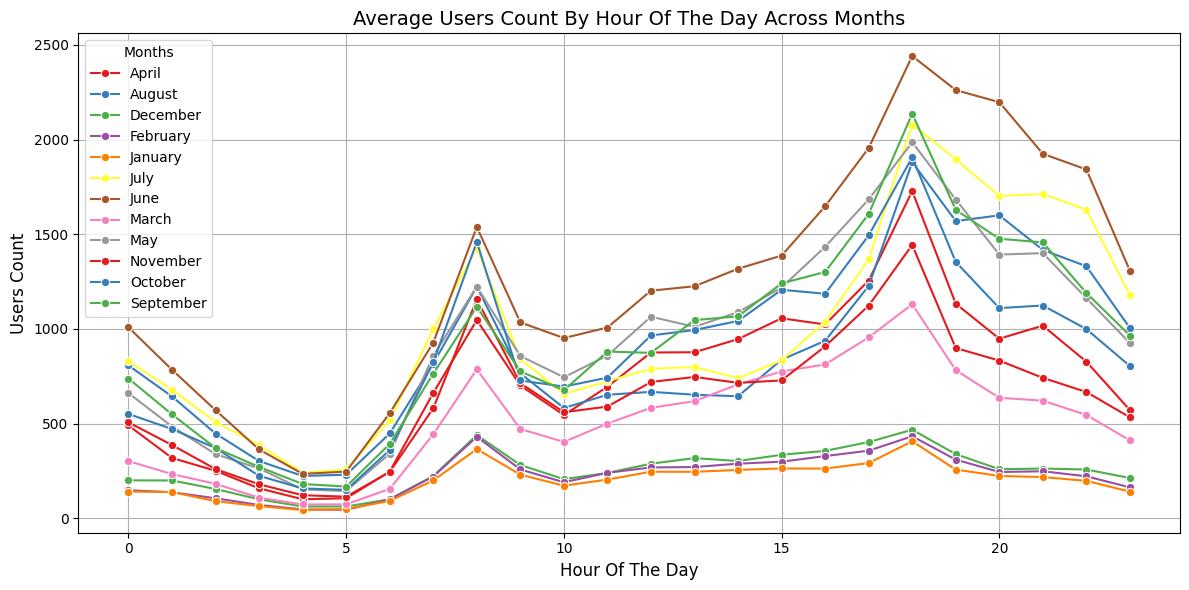

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot average users count by hour across months
def plot_average_users_by_hour_month(df, target, hour_col='Hour', month_col='month'):
    """
    Plot average user count by hour of the day across months.
    Parameters:
    - df: DataFrame containing the data.
    - target: Name of the target variable column (e.g., Rented Bike Count).
    - hour_col: Name of the hour column.
    - month_col: Name of the month column.
    """
    # Map month codes to names
    month_mapping = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
        7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
    df[month_col] = df[month_col].map(month_mapping)

    # Aggregate the data
    aggregated_data = df.groupby([hour_col, month_col])[target].mean().reset_index()

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=aggregated_data,
        x=hour_col,
        y=target,
        hue=month_col,
        marker='o',
        palette='Set1'
    )

    # Customize the plot
    plt.title('Average Users Count By Hour Of The Day Across Months', fontsize=14)
    plt.xlabel('Hour Of The Day', fontsize=12)
    plt.ylabel('Users Count', fontsize=12)
    plt.legend(title='Months', fontsize=10, loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example call
plot_average_users_by_hour_month(train_data, target='Rented Bike Count', hour_col='Hour', month_col='month')


In [267]:
X_train.head()

,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat10,...,Humidity,Rainfall,Seasons,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed,year,month
181,0.567474,0.863109,0.606269,0.269287,0.132282,0.582956,0.770239,0.479746,0.502703,0.717838,...,0.469388,0.0,1,0.0,0.306818,0.551664,0.477377,0.178082,1,3
2277,0.219723,0.156795,0.566892,0.333400,0.699078,0.656349,0.380541,0.646317,0.572111,0.425791,...,0.520408,0.0,4,0.0,0.000000,0.141856,1.000000,0.383562,1,1
10579,0.448097,0.115778,0.884505,0.673197,0.037794,0.317746,0.325614,0.476287,0.387330,0.461547,...,0.520408,0.0,4,0.0,0.306818,0.390543,0.546518,0.520548,1,2
5328,0.557093,0.808543,0.697075,0.899319,0.666553,0.593633,0.073607,0.577424,0.454214,0.024108,...,0.408163,0.0,3,0.0,0.247159,0.577933,0.680224,0.369863,1,11
5992,0.493080,0.609300,0.041631,0.088575,0.888860,0.917289,0.089591,0.591544,0.471061,0.634970,...,0.775510,0.0,1,0.0,0.000000,0.339755,0.503813,0.095890,1,3


In [299]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Apply Boruta for Feature Selection
# Initialize the random forest model
rf = RandomForestRegressor(n_jobs=-1, random_state=42)

# Initialize Boruta
boruta = BorutaPy(estimator=rf, n_estimators='auto', random_state=42)

# Fit Boruta on training data
boruta.fit(X_train.values, y_train.values)

# Get the selected features
selected_features = X_train.columns[boruta.support_]
print("Selected Features by Boruta:")
print(selected_features)

# Filter the dataset to only include selected features
X_train_boruta = X_train[selected_features]
X_test_boruta = X_test[selected_features]

# Step 2: Apply Recursive Feature Elimination (RFE)
# Initialize the random forest model for RFE
rfe_rf = RandomForestRegressor(n_jobs=-1, random_state=42)

# Initialize RFE
rfe = RFE(estimator=rfe_rf, n_features_to_select=21)  # Optimal features set to 21
rfe.fit(X_train_boruta, y_train)

# Get the selected features from RFE
rfe_selected_features = X_train_boruta.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_selected_features)

# Filter the dataset to include only RFE-selected features
X_train_rfe = X_train_boruta[rfe_selected_features]
X_test_rfe = X_test_boruta[rfe_selected_features]

# Step 3: Evaluate Model Performance
# Train the model with the final selected features
final_model = RandomForestRegressor(n_jobs=-1, random_state=42)
final_model.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred = final_model.predict(X_test_rfe)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRMSE with Selected Features: {rmse}")

Selected Features by Boruta:
Index(['Dew point temperature', 'feat07', 'feat08', 'Functioning Day', 'Hour',
       'Humidity', 'Rainfall', 'Seasons', 'Solar Radiation', 'Temperature',
       'Visibility', 'Wind speed', 'month'],
      dtype='object')


c:\Users\Shokoufeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=21 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(



Selected Features by RFE:
Index(['Dew point temperature', 'feat07', 'feat08', 'Functioning Day', 'Hour',
       'Humidity', 'Rainfall', 'Seasons', 'Solar Radiation', 'Temperature',
       'Visibility', 'Wind speed', 'month'],
      dtype='object')

RMSE with Selected Features: 0.05326092421291914
